In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re


In [1]:
# from google.colab import drive
# import os
# drive.mount('/content/drive', force_remount=True)
# file_path='/content/drive/My Drive/[FBLA Data Analysis] - Air Quality Exploration/Datasets'
# os.chdir(file_path)

import os
file_path='/Users/varunnarayanan/Downloads/Datasets'
os.chdir(file_path)


In [2]:

# Economic Conditions
poverty_df = pd.read_csv("Economic Conditions/NYC EH Data Portal - Neighborhood poverty (full table).csv")

# Air Quality
black_carbon_df = pd.read_csv(f'{file_path}/Air Quality/NYC EH Data Portal - Black carbon (full table).csv')
nitric_oxide_df = pd.read_csv(f'{file_path}/Air Quality/NYC EH Data Portal - Nitric oxide (NO) (full table).csv')
nitrogen_dioxide_df = pd.read_csv(f'{file_path}/Air Quality/NYC EH Data Portal - Nitrogen dioxide (NO2) (full table).csv')
fine_particles_df = pd.read_csv(f'{file_path}/Air Quality/Fine particles (PM 2.5).csv')

# Active Design
vegetative_cover_df = pd.read_csv(f'{file_path}/Active Design/NYC EH Data Portal - Vegetative cover (full table).csv')
tree_canopy_df = pd.read_csv(f'{file_path}/Active Design/Tree canopy cover.csv')

# Walking, Driving, and Cycling
miles_traveled_df = pd.read_csv(f'{file_path}/Walking, Driving, and Cycling/NYC EH Data Portal - Annual vehicle miles traveled (full table).csv')

# Cigarette Smoke
secondhand_smoke_df = pd.read_csv(f'{file_path}/Cigarette Smoke/NYC EH Data Portal - Secondhand smoke at home (full table).csv')
tobacco_retailers_df = pd.read_csv(f'{file_path}/Cigarette Smoke/NYC EH Data Portal - Tobacco retailers (full table).csv')



dfs = {
    "poverty": poverty_df,
    "black_carbon": black_carbon_df,
    "nitric_oxide": nitric_oxide_df,
    "nitrogen_dioxide": nitrogen_dioxide_df,
    "fine_particles": fine_particles_df,
    "vegetative_cover": vegetative_cover_df,
    "tree_canopy": tree_canopy_df,
    "miles_traveled": miles_traveled_df,
    "secondhand_smoke": secondhand_smoke_df,
    "tobacco_retailers": tobacco_retailers_df
}


for name, df in dfs.items():
  print(f"\n{name}:\n{df.isnull().sum()}\n\n\n\n{df.info()}")


NameError: name 'pd' is not defined

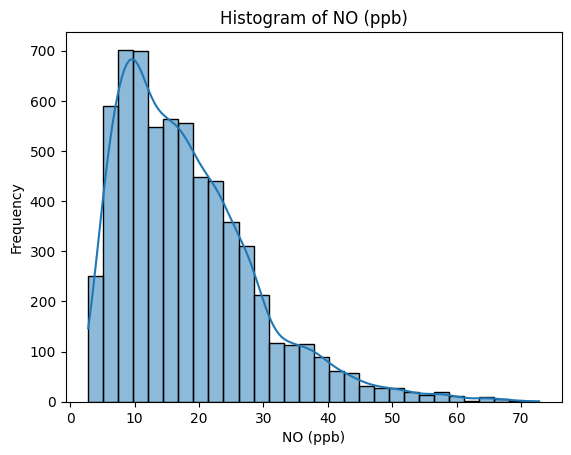

In [ ]:
# Check dist of values in nitric_oxide before imputing
sns.histplot(dfs["nitric_oxide"]['Mean ppb'], kde=True, bins=30)
plt.title("Histogram of NO (ppb)")
plt.xlabel("NO (ppb)")
plt.ylabel("Frequency")
plt.show()

dfs['nitric_oxide'] = dfs['nitric_oxide'].fillna({'Mean ppb': dfs['nitric_oxide']['Mean ppb'].median()})

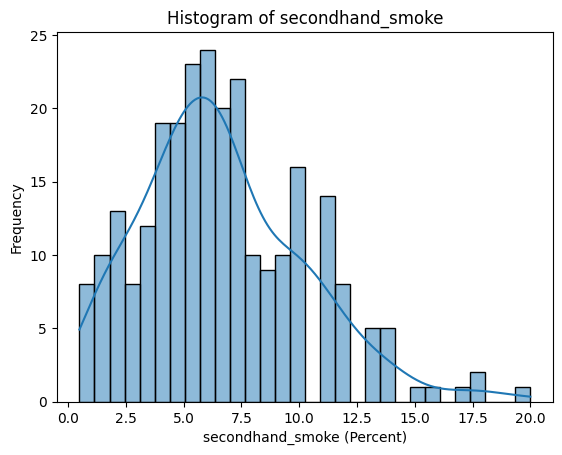

,index,TimePeriod,GeoType,GeoID,GeoRank,Geography,Number,Percent
0,0,2012,UHF42,101,3,Kingsbridge - Riverdale,"1,000*",1.5
1,2,2012,UHF42,103,3,Fordham - Bronx Park,"12,000*",6.6
2,3,2012,UHF42,104,3,Pelham - Throgs Neck,"15,000*",7.1
3,6,2012,UHF42,203,3,Bedford Stuyvesant - Crown Heights,"20,000*",8.7
4,7,2012,UHF42,204,3,East New York,"9,000*",7.3
5,9,2012,UHF42,206,3,Borough Park,"5,000*",2.2
6,10,2012,UHF42,207,3,East Flatbush - Flatbush,"4,000*",1.7
7,11,2012,UHF42,208,3,Canarsie - Flatlands,"8,000*",5.5
8,13,2012,UHF42,210,3,Coney Island - Sheepshead Bay,"7,000*",3.2
9,14,2012,UHF42,211,3,Williamsburg - Bushwick,"12,000*",8.2


In [ ]:

# Map UHF 34 to UHF 42 in secondhand_smoke


# Mapping of UHF 42 IDs to geographies
uhf42_to_geography = {
    '101': 'Kingsbridge - Riverdale',
    '102': 'Northeast Bronx',
    '103': 'Fordham - Bronx Park',
    '104': 'Pelham - Throgs Neck',
    '105': 'Crotona - Tremont',
    '106': 'High Bridge - Morrisania',
    '107': 'Hunts Point - Mott Haven',
    '201': 'Greenpoint',
    '202': 'Downtown - Heights - Slope',
    '203': 'Bedford Stuyvesant - Crown Heights',
    '204': 'East New York',
    '205': 'Sunset Park',
    '206': 'Borough Park',
    '207': 'East Flatbush - Flatbush',
    '208': 'Canarsie - Flatlands',
    '209': 'Bensonhurst - Bay Ridge',
    '210': 'Coney Island - Sheepshead Bay',
    '211': 'Williamsburg - Bushwick',
    '301': 'Washington Heights - Inwood',
    '302': 'Central Harlem - Morningside Heights',
    '303': 'East Harlem',
    '304': 'Upper West Side',
    '305': 'Upper East Side',
    '306': 'Chelsea - Clinton',
    '307': 'Gramercy Park - Murray Hill',
    '308': 'Greenwich Village - Soho',
    '309': 'Union Square - Lower East Side',
    '310': 'Lower Manhattan',
    '401': 'Long Island City - Astoria',
    '402': 'West Queens',
    '403': 'Flushing - Clearview',
    '404': 'Bayside - Little Neck',
    '405': 'Ridgewood - Forest Hills',
    '406': 'Fresh Meadows',
    '407': 'Southwest Queens',
    '408': 'Jamaica',
    '409': 'Southeast Queens',
    '410': 'Rockaway',
    '501': 'Port Richmond',
    '502': 'Stapleton - St. George',
    '503': 'Willowbrook',
    '504': 'South Beach - Tottenville'
}

# Function to split UHF 34 ID into UHF 42 IDs
def split_uhf34_to_uhf42(uhf34_id):
    return [uhf34_id[i:i+3] for i in range(0, len(uhf34_id), 3)]

# Expand the dataset by replacing UHF 34 IDs with UHF 42 IDs
expanded_rows = []
for _, row in dfs['secondhand_smoke'].iterrows():
    uhf34_id = str(row['GeoID'])
    uhf42_ids = split_uhf34_to_uhf42(uhf34_id)
    for uhf42_id in uhf42_ids:
        geography = uhf42_to_geography.get(uhf42_id, 'Unknown')
        new_row = row.copy()
        new_row['GeoID'] = uhf42_id
        new_row['Geography'] = geography
        expanded_rows.append(new_row)


dfs['secondhand_smoke'] = pd.DataFrame(expanded_rows)


def clean_percent(value):
    if value == '**':
        return None
    cleaned_value = str(value)[:3].strip()
    try:
        return float(cleaned_value)
    except ValueError:
        return None

dfs['secondhand_smoke']['Percent'] = dfs['secondhand_smoke']['Percent'].apply(clean_percent)
dfs['secondhand_smoke']['GeoType'] = dfs['secondhand_smoke']['GeoType'].replace('UHF34', 'UHF42')
# dfs['secondhand_smoke'] = dfs['secondhand_smoke'].fillna({'Percent': dfs['secondhand_smoke']['Percent'].median()})
sns.histplot(dfs['secondhand_smoke']['Percent'], kde=True, bins=30)
plt.title("Histogram of secondhand_smoke")
plt.xlabel("secondhand_smoke (Percent)")
plt.ylabel("Frequency")
plt.show()

dfs['secondhand_smoke'] = dfs['secondhand_smoke'].dropna(axis =0).reset_index()


dfs['secondhand_smoke'].head(50)


In [ ]:




def clean_data(name, df):
  df = df.iloc[:, ~df.columns.str.lower().str.contains('geoid|georank|timeperiod|number|90|10')]
  df.columns = [f"{col} ({name})" if col != "Geography" else col for col in df.columns]
  return df


cleaned_dfs = {f"{name}_cleaned": clean_data(name, df) for name, df in dfs.items()}





for name, df in cleaned_dfs.items():
  print(f"\n{name}:\n{df.isnull().sum()}\n\n\n\n{df.info()}")
  df.to_csv(f'{file_path}/Random Forest Cleaned Data/{name}.csv', index = False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3758 entries, 0 to 3757
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GeoType (poverty)  3758 non-null   object 
 1   Geography          3758 non-null   object 
 2   Percent (poverty)  3758 non-null   float64
dtypes: float64(1), object(2)
memory usage: 88.2+ KB

poverty_cleaned:
GeoType (poverty)    0
Geography            0
Percent (poverty)    0
dtype: int64



None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   GeoType (black_carbon)                6193 non-null   object 
 1   Geography                             6193 non-null   object 
 2   Mean absorbance units (black_carbon)  6193 non-null   float64
dtypes: float64(1), object(2)
memory usage: 145.3+ K

In [ ]:
for name, df in cleaned_dfs.items():
  og_name = re.search(r'(.*)_cleaned', name).group(1)
  print(cleaned_dfs[name].groupby(f'GeoType ({og_name})').count())

                   Geography  Percent (poverty)
GeoType (poverty)                              
Borough                   55                 55
CD                       531                531
CDTA2020                 118                118
Citywide                  11                 11
NTA2010                 1692               1692
NTA2020                  394                394
Subboro                  495                495
UHF42                    462                462
                        Geography  Mean absorbance units (black_carbon)
GeoType (black_carbon)                                                 
Borough                       225                                   225
CD                           2655                                  2655
Citywide                       45                                    45
UHF34                        1462                                  1462
UHF42                        1806                                  1806
                

In [ ]:


for key, df in cleaned_dfs.items():
    duplicate_count = df["Geography"].duplicated().sum()
    total_rows = len(df)
    print(f"{key}: {duplicate_count} duplicate Geography values out of {total_rows} rows")

poverty_cleaned: 3250 duplicate Geography values out of 3758 rows
black_carbon_cleaned: 6079 duplicate Geography values out of 6193 rows
nitric_oxide_cleaned: 6330 duplicate Geography values out of 6444 rows
nitrogen_dioxide_cleaned: 5475 duplicate Geography values out of 5589 rows
fine_particles_cleaned: 5475 duplicate Geography values out of 5589 rows
vegetative_cover_cleaned: 54 duplicate Geography values out of 343 rows
tree_canopy_cleaned: 0 duplicate Geography values out of 48 rows
miles_traveled_cleaned: 214 duplicate Geography values out of 321 rows
secondhand_smoke_cleaned: 218 duplicate Geography values out of 261 rows
tobacco_retailers_cleaned: 4 duplicate Geography values out of 363 rows


In [ ]:
for name, df in cleaned_dfs.items():
    df["Geography"] += "_" + df.groupby("Geography").cumcount().astype(str)



/var/folders/_y/npf5s8qj58x6w0c42g9nz4nh0000gn/T/ipykernel_30165/2863788995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Geography"] += "_" + df.groupby("Geography").cumcount().astype(str)
/var/folders/_y/npf5s8qj58x6w0c42g9nz4nh0000gn/T/ipykernel_30165/2863788995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Geography"] += "_" + df.groupby("Geography").cumcount().astype(str)
/var/folders/_y/npf5s8qj58x6w0c42g9nz4nh0000gn/T/ipykernel_30165/2863788995.py:2: SettingWithCopyWarning: 
A val

In [ ]:
cleaned_dfs


{'poverty_cleaned':      GeoType (poverty)                 Geography  Percent (poverty)
 0              NTA2020  Mott Haven-Port Morris_0               43.7
 1              NTA2020                 Melrose_0               40.7
 2              NTA2020             Hunts Point_0               34.3
 3              NTA2020                Longwood_0               32.0
 4              NTA2020              Morrisania_0               35.7
 ...                ...                       ...                ...
 3753           Borough               Brooklyn_10               22.1
 3754           Borough              Manhattan_10               17.6
 3755           Borough                 Queens_10               13.7
 3756           Borough          Staten Island_10               11.0
 3757          Citywide          New York City_10               19.4
 
 [3758 rows x 3 columns],
 'black_carbon_cleaned':      GeoType (black_carbon)                              Geography  \
 0                        CD  

In [ ]:
from functools import reduce

dfs = list(cleaned_dfs.values())

merged_df = reduce(lambda left, right: left.merge(right, on="Geography", how="inner"), dfs)
merged_df = merged_df.iloc[:, ~merged_df.columns.str.lower().str.contains('geotype')]
merged_df

,Geography,Percent (poverty),Mean absorbance units (black_carbon),Mean ppb (nitric_oxide),Mean ppb (nitrogen_dioxide),Mean mcg/m3 (fine_particles),Percent (vegetative_cover),Percent of land area (tree_canopy),Million miles per square mile (miles_traveled),index (secondhand_smoke),Percent (secondhand_smoke),Density per square mile (tobacco_retailers)
0,Greenpoint_0,9.3,0.8,16.0,19.3,7.4,12.4,8.9,88.6,44,2.4,26.0
1,Borough Park_0,34.5,0.5,10.4,16.3,6.6,22.6,16.5,69.7,9,2.2,13.1
2,Jamaica_0,15.7,0.5,9.8,15.4,6.6,15.0,20.1,47.8,24,2.6,28.0
3,Port Richmond_0,22.0,0.6,9.3,16.3,6.5,36.4,21.6,17.0,31,6.0,10.0
4,Kingsbridge - Riverdale_0,16.2,0.7,8.5,14.6,6.8,63.0,46.9,80.8,0,1.5,7.7
5,Northeast Bronx_0,14.8,0.7,8.8,14.5,6.8,36.0,20.5,47.7,41,6.8,12.0
6,Pelham - Throgs Neck_0,20.3,0.6,10.1,15.6,6.9,46.0,22.3,64.5,3,7.1,11.3
7,High Bridge - Morrisania_0,35.8,0.7,11.6,17.1,6.9,21.0,13.0,81.6,33,9.4,35.1
8,Hunts Point - Mott Haven_0,36.3,0.7,14.0,17.5,7.2,18.0,7.1,57.4,33,9.4,19.3
9,Downtown - Heights - Slope_0,13.7,0.7,14.4,18.3,7.2,22.0,16.0,126.8,45,9.2,24.1


Mean Squared Error: 0.061502777777777524
Root Mean Squared Error: 0.24799753583005119
Mean Absolute Error: 0.21027777777777742
R-squared: 0.6079504205400637
                                          Feature  Importance
1              Percent of land area (tree_canopy)    0.282900
2  Million miles per square mile (miles_traveled)    0.247951
4     Density per square mile (tobacco_retailers)    0.218421
0                      Percent (vegetative_cover)    0.202331
3                      Percent (secondhand_smoke)    0.026226
5                               Percent (poverty)    0.022171


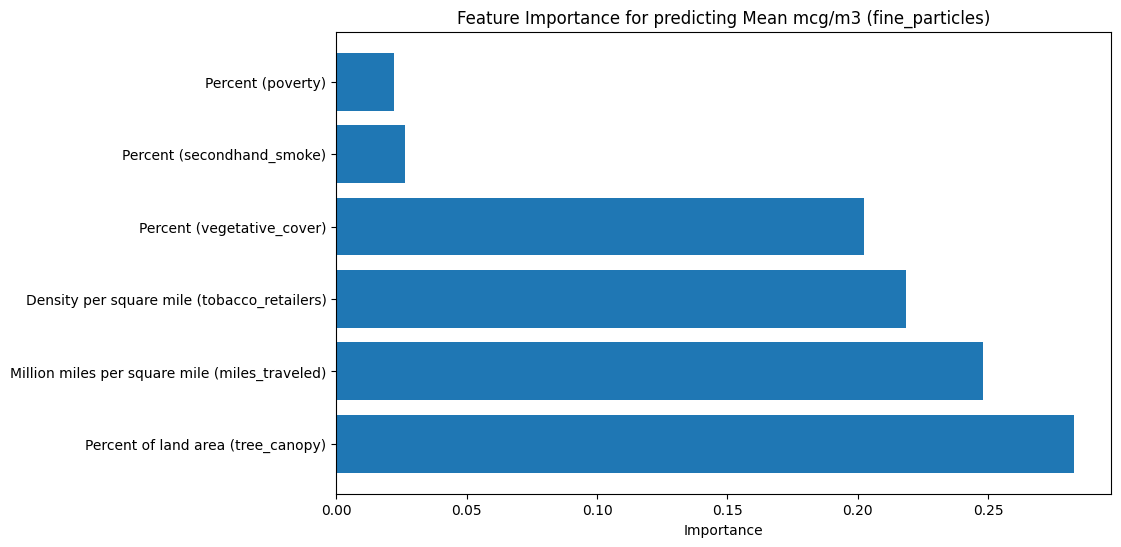

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    make_scorer,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)



X = merged_df[['Percent (vegetative_cover)', 
        'Percent of land area (tree_canopy)', 
        'Million miles per square mile (miles_traveled)', 
        'Percent (secondhand_smoke)', 
        'Density per square mile (tobacco_retailers)', 
        'Percent (poverty)']]


y = merged_df['Mean mcg/m3 (fine_particles)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


rf_model = RandomForestRegressor(n_estimators=30, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance with column names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title(f'Feature Importance for predicting Mean mcg/m3 (fine_particles)')
plt.show()

